In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
root_folder = '/kaggle/input/data'
file_paths_dict = {}
for root, dirs, files in os.walk(root_folder):
    if root != root_folder:
        for f in files:
            file_name = f
            file_paths_dict[file_name] = os.path.join(root, f)
            
print(file_paths_dict["00006199_010.png"])

/kaggle/input/data/images_003/images/00006199_010.png


In [3]:
all_df = pd.read_csv('/kaggle/input/data/Data_Entry_2017.csv')

all_df['path'] = all_df['Image Index'].map(file_paths_dict.get)
all_df['path'] = all_df['Image Index'].map(file_paths_dict.get)

all_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
47501,00012060_004.png,No Finding,4,12060,59,F,AP,3056,2544,0.139,0.139,NaN,/kaggle/input/data/images_006/images/00012060_...
49015,00012420_000.png,Cardiomegaly,0,12420,53,F,PA,2802,2989,0.143,0.143,NaN,/kaggle/input/data/images_006/images/00012420_...
30759,00008019_001.png,No Finding,1,8019,23,M,PA,2818,2985,0.143,0.143,NaN,/kaggle/input/data/images_004/images/00008019_...


In [4]:
from itertools import chain
all_labels = np.unique(list(chain(*all_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_df[c_label] = all_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
40607,00010544_031.png,Infiltration|Pneumonia,31,10544,33,F,AP,2500,2048,0.168000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
109977,00029919_009.png,No Finding,9,29919,20,M,AP,3056,2544,0.139000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
95332,00025043_000.png,No Finding,0,25043,23,M,PA,2021,2021,0.194311,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


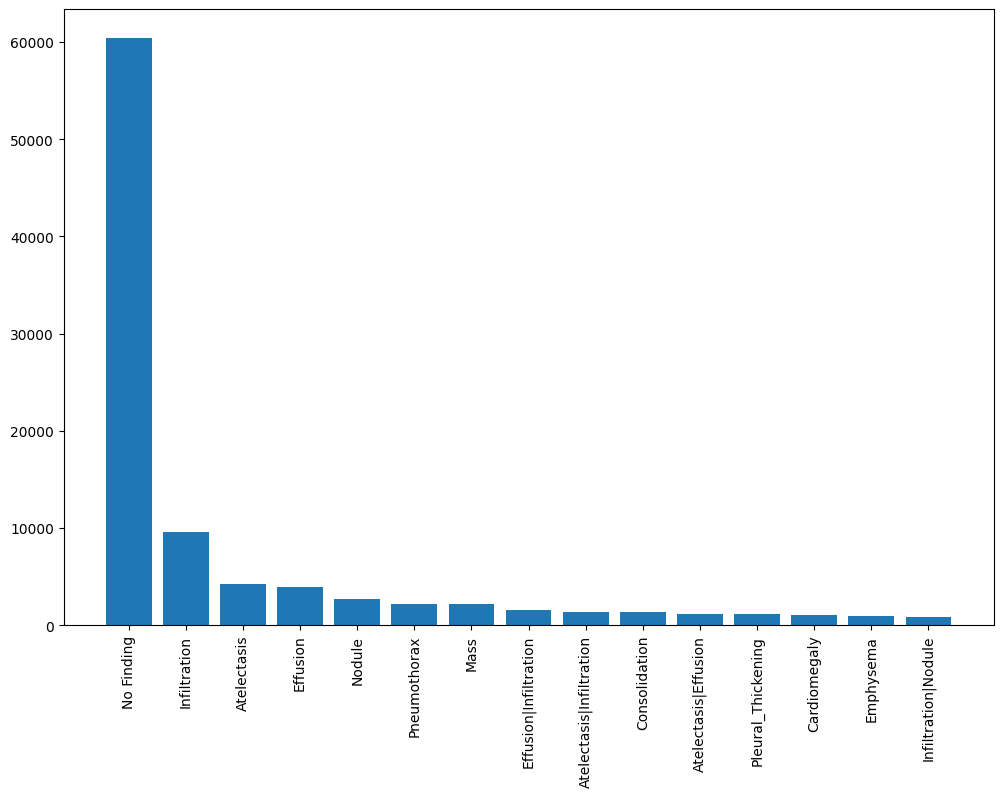

In [5]:
label_counts = all_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [6]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(all_df[c_label].sum())) for c_label in all_labels])

Clean Labels (14) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('No Finding', 60361), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


In [7]:
no_finding_indices = all_df[all_df['Finding Labels'] == 'No Finding'].index
indices_to_drop = np.random.choice(no_finding_indices, size=(len(no_finding_indices) * 2) // 3, replace=False)
all_df = all_df.drop(indices_to_drop)

In [8]:
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(all_df[c_label].sum())) for c_label in all_labels])

Clean Labels (14) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('No Finding', 20121), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


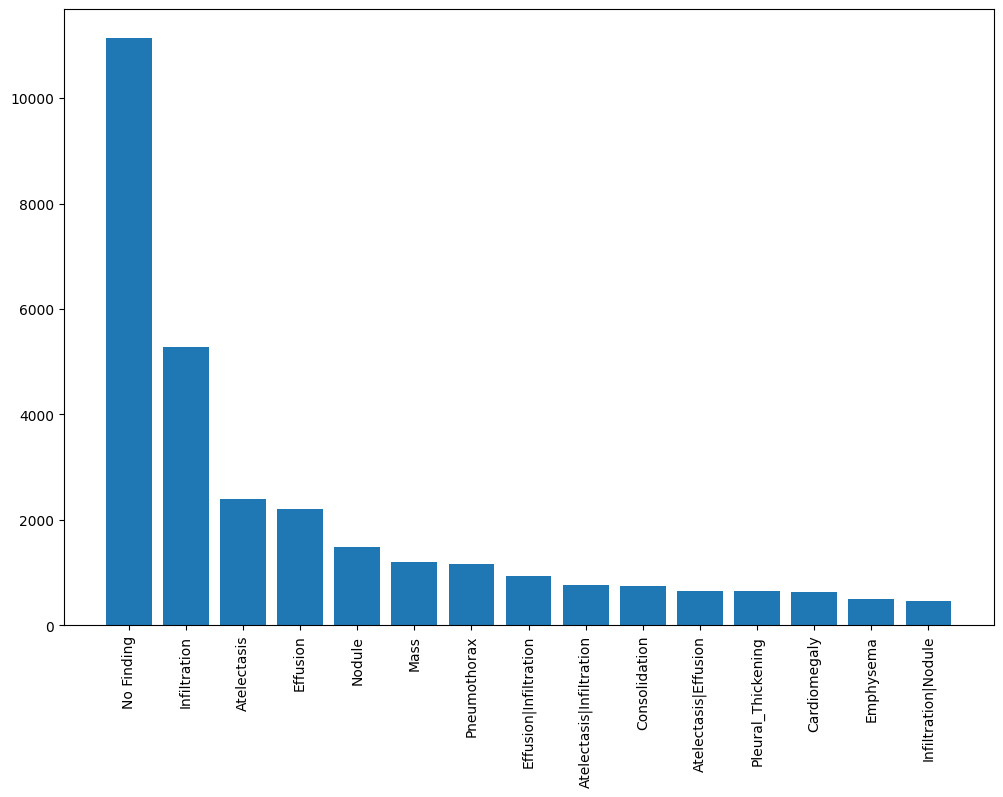

In [9]:
all_df = all_df.sample(40000)

label_counts = all_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [10]:
all_df['disease_vec'] = all_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = all_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 30000 validation 10000


In [11]:
valid_df['newLabel'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['newLabel'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

In [12]:
train_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,disease_vec,newLabel
14279,00003702_000.png,No Finding,0,3702,23,F,AP,2048,2500,0.171,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[No Finding]
4709,00001255_037.png,No Finding,37,1255,13,M,AP,2048,2500,0.171,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[No Finding]
100836,00026785_019.png,Atelectasis|Infiltration,19,26785,39,M,AP,3056,2544,0.139,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[Atelectasis, Infiltration]"
71636,00017645_012.png,Atelectasis|Effusion,12,17645,48,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[Atelectasis, Effusion]"
29538,00007683_003.png,No Finding,3,7683,74,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[No Finding]


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

2024-03-16 11:24:54.106967: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 11:24:54.107099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 11:24:54.264720: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
train_gen = core_idg.flow_from_dataframe(dataframe=train_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

valid_gen = core_idg.flow_from_dataframe(dataframe=valid_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 256) # we can use much larger batches for evaluation

train_X, train_Y = next(core_idg.flow_from_dataframe(dataframe=train_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024))

test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=valid_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024))

Found 29953 validated image filenames belonging to 14 classes.
Found 9985 validated image filenames belonging to 14 classes.
Found 29953 validated image filenames belonging to 14 classes.
Found 9985 validated image filenames belonging to 14 classes.


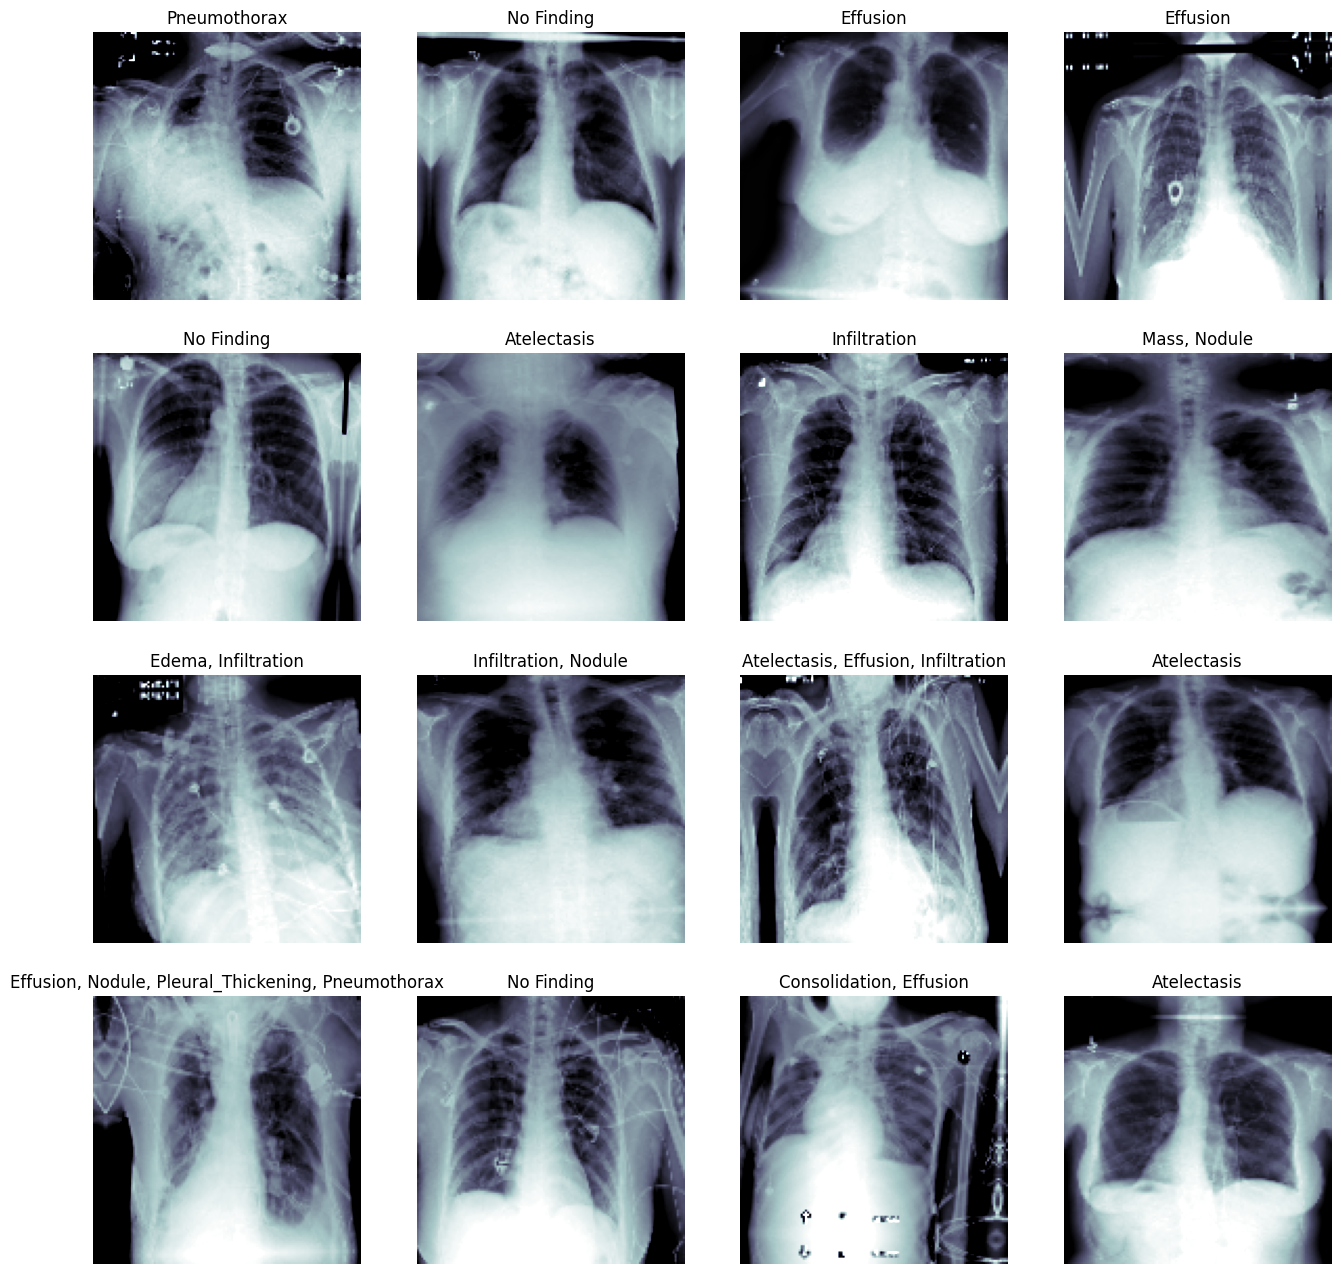

In [15]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

In [16]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras import optimizers, callbacks, regularizers
base_mobilenet_model = MobileNet(input_shape =  t_x.shape[1:], 
                                 include_top = False, weights = None)
multi_disease_model = Sequential()
multi_disease_model.add(base_mobilenet_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
multi_disease_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional) │ ?                      │     3,228,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,288 (12.31 MB)

 Trainable params: 3,206,400 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [17]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="xray_class_best.weights.h5"

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5)
callbacks_list = [checkpoint, early]

In [18]:
optimizers_list = [('sgd',optimizers.SGD( learning_rate=.1) ),
                   ('sgd_momentum',optimizers.SGD(learning_rate=.1, ema_momentum=.9) ),
                   ('adagrad',optimizers.Adagrad()),
                   ('adadelta',optimizers.Adadelta()),
                   ('adam', optimizers.Adam()) 
                  ]

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5)

callbacks_list = [early, ModelCheckpoint(filepath=weight_path, monitor='val_loss', mode='min', save_best_only=True, save_weights_only = True )]

Epoch 1/2


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 937/1000 ━━━━━━━━━━━━━━━━━━━━ 1:11 1s/step - binary_accuracy: 0.8824 - loss: 0.3383 - mae: 0.1739

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1088s 1s/step - binary_accuracy: 0.8829 - loss: 0.3370 - mae: 0.1734 - val_binary_accuracy: 0.8967 - val_loss: 0.2983 - val_mae: 0.1526
Epoch 2/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1060s 1s/step - binary_accuracy: 0.8966 - loss: 0.2979 - mae: 0.1632 - val_binary_accuracy: 0.8967 - val_loss: 0.2891 - val_mae: 0.1551
Epoch 1/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1013s 1000ms/step - binary_accuracy: 0.8987 - loss: 0.2897 - mae: 0.1615 - val_binary_accuracy: 0.8968 - val_loss: 0.2870 - val_mae: 0.1561
Epoch 2/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1040s 1s/step - binary_accuracy: 0.8989 - loss: 0.2851 - mae: 0.1616 - val_binary_accuracy: 0.8975 - val_loss: 0.2870 - val_mae: 0.1527
Epoch 1/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1070s 1s/step - binary_accuracy: 0.8994 - loss: 0.2809 - mae: 0.1589 - val_binary_accuracy: 0.8979 - val_loss: 0.2837 - val_mae: 0.1579
Epoch 2/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1109s 1s/step - binary_accuracy: 0.8993 - loss: 0.2813 - mae: 0.1603 - val_binar

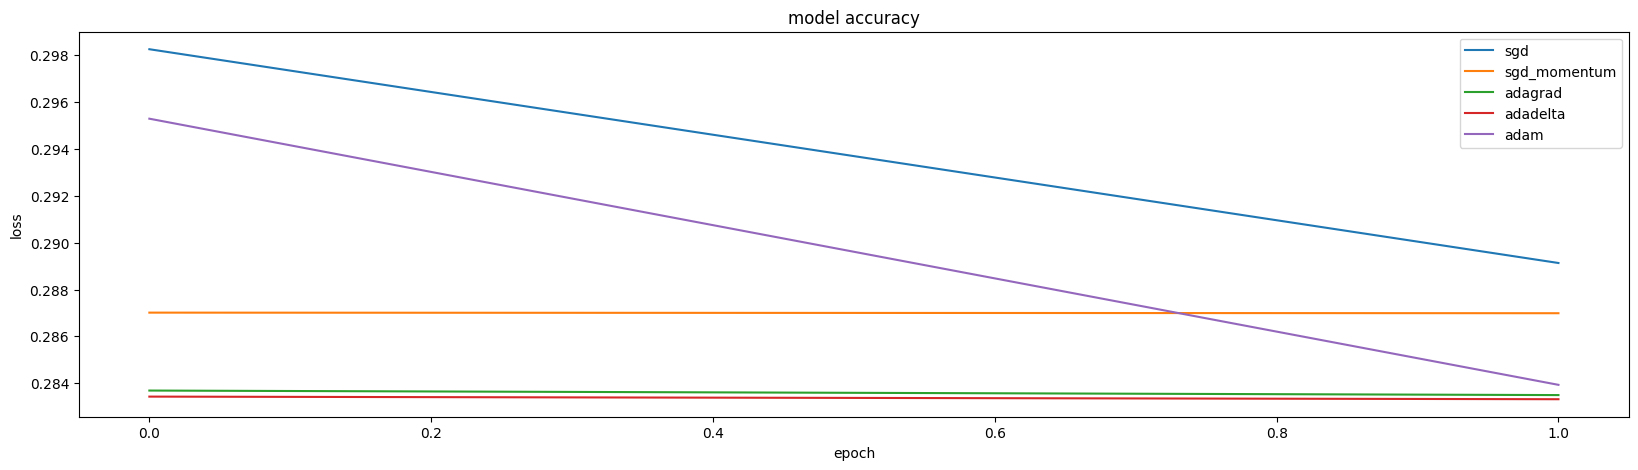

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(20,5))
for optimizer in optimizers_list:
    multi_disease_model.compile(optimizer = optimizer[1], loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
    
    history = multi_disease_model.fit(train_gen, 
                                  steps_per_epoch=1000,
                                  validation_data = (test_X, test_Y), 
                                  epochs = 2, 
                                  callbacks = callbacks_list)
      
    
    plt.plot(history.history['val_loss'])
    
plt.legend([x[0] for x in optimizers_list], loc='upper right')
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('optimizer_selection.png', bbox_inches='tight')